In [1]:
# !mkdir dcgan
# !mkdir dcgan/tf
# !mkdir dcgan/tf/images
# !mkdir dcgan/tf/training_checkpoints

In [2]:
#import the required packages
import os
import time
from tensorflow import keras
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt

%matplotlib inline
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [3]:
def generator():
    
    inputs = keras.Input(shape=(1, 1, 100), name='input_layer')
    x = layers.Conv2DTranspose(64 * 8, kernel_size=4, strides= 4, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(
    mean=0.0, stddev=0.02), use_bias=False, name='conv_transpose_1')(inputs)
    x = layers.BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_1')(x)
    x = layers.ReLU(name='relu_1')(x)
    
    x = layers.Conv2DTranspose(64 * 4, kernel_size=4, strides= 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(
    mean=0.0, stddev=0.02), use_bias=False, name='conv_transpose_2')(x)
    x = layers.BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_2')(x)
    x = layers.ReLU(name='relu_2')(x)
    
    x = layers.Conv2DTranspose(64 * 2, 4, 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(
    mean=0.0, stddev=0.02), use_bias=False, name='conv_transpose_3')(x)
    x = layers.BatchNormalization(momentum=0.1,  epsilon=0.8,  center=1.0, scale=0.02, name='bn_3')(x)
    x = layers.ReLU(name='relu_3')(x)
  

    x = layers.Conv2DTranspose(64 * 1, 4, 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(
    mean=0.0, stddev=0.02), use_bias=False, name='conv_transpose_4')(x)
    x = layers.BatchNormalization(momentum=0.1,  epsilon=0.8,  center=1.0, scale=0.02, name='bn_4')(x)
    x = layers.ReLU(name='relu_4')(x)
    
    outputs = layers.Conv2DTranspose(3, 4, 2,padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(
    mean=0.0, stddev=0.02), use_bias=False, activation='tanh', name='conv_transpose_5')(x)
   
    model = tf.keras.Model(inputs, outputs, name="Generator")
    return model

In [4]:
generator = generator()

In [5]:
BATCH_SIZE=128
latent_dim = 100
num_examples_to_generate = 25

(25, 64, 64, 3)


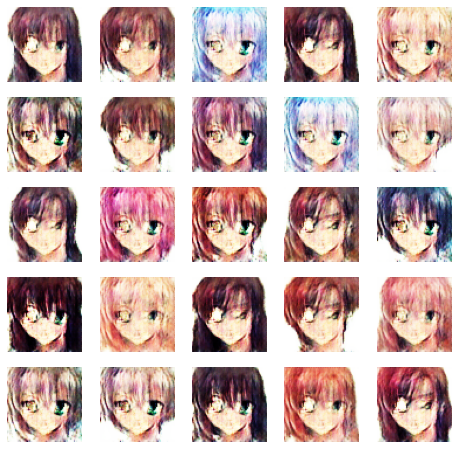

In [6]:
generator.load_weights('dcgan/tf/training_weights/gen_89.h5')
seed = tf.random.normal([num_examples_to_generate, 1, 1, latent_dim])
predictions = generator(seed, training=False)
print(predictions.shape)
fig = plt.figure(figsize=(8,8))

for i in range(predictions.shape[0]):
    plt.subplot(5, 5, i+1)
    pred = (predictions[i, :, :, :] + 1 ) * 127.5
    pred = np.array(pred)  
    plt.imshow(pred.astype(np.uint8))
    plt.axis('off')

plt.savefig('dcgan/tf/images/image_at_epoch_xx.png')
plt.show()